In [ ]:
#https://www.kaggle.com/code/sudhirnl7/wine-recommender/notebook
#https://www.kaggle.com/datasets/zynicide/wine-reviews
#https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadswinecsv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.0 MB/s eta 0:00:00a 0:00:01


In [4]:
! pip install missingno

In [6]:
wine_150k = pd.read_csv('winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",wine.shape)

Number of rows and columns: (280901, 13)


In [7]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [8]:
wine.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901.0,NaN,NaN,NaN,88.146934,3.151528,80.0,86.0,88.0,90.0,100.0
price,258210.0,NaN,NaN,NaN,34.177162,38.611708,4.0,16.0,25.0,40.0,3300.0
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,280900,756,Pinot Noir,27563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winery,280901,19186,Williams Selyem,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

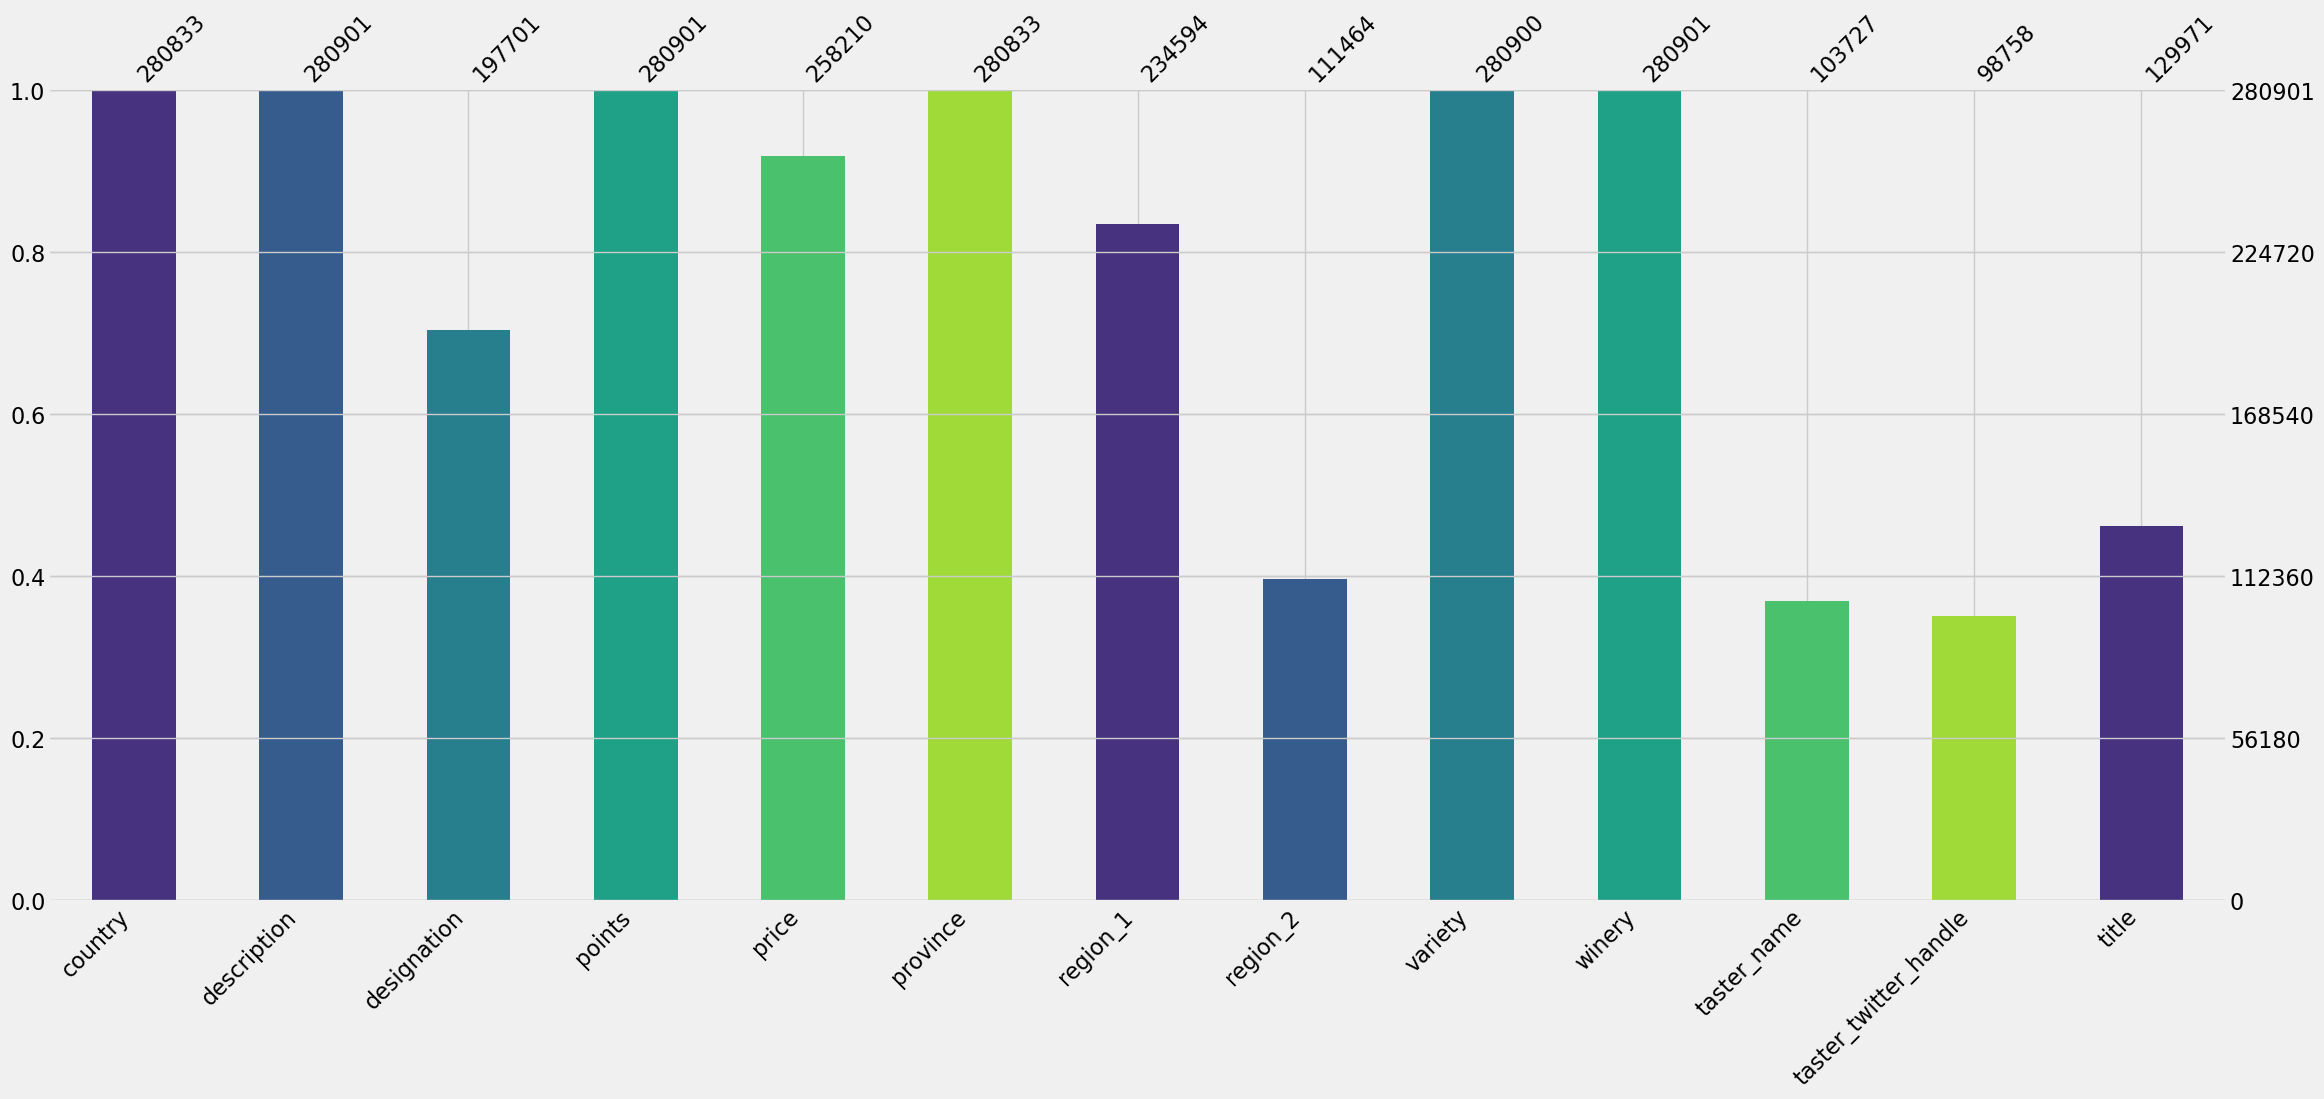

In [9]:
msno.bar(wine,color= sns.color_palette('viridis'))

Number of country list in data: 50


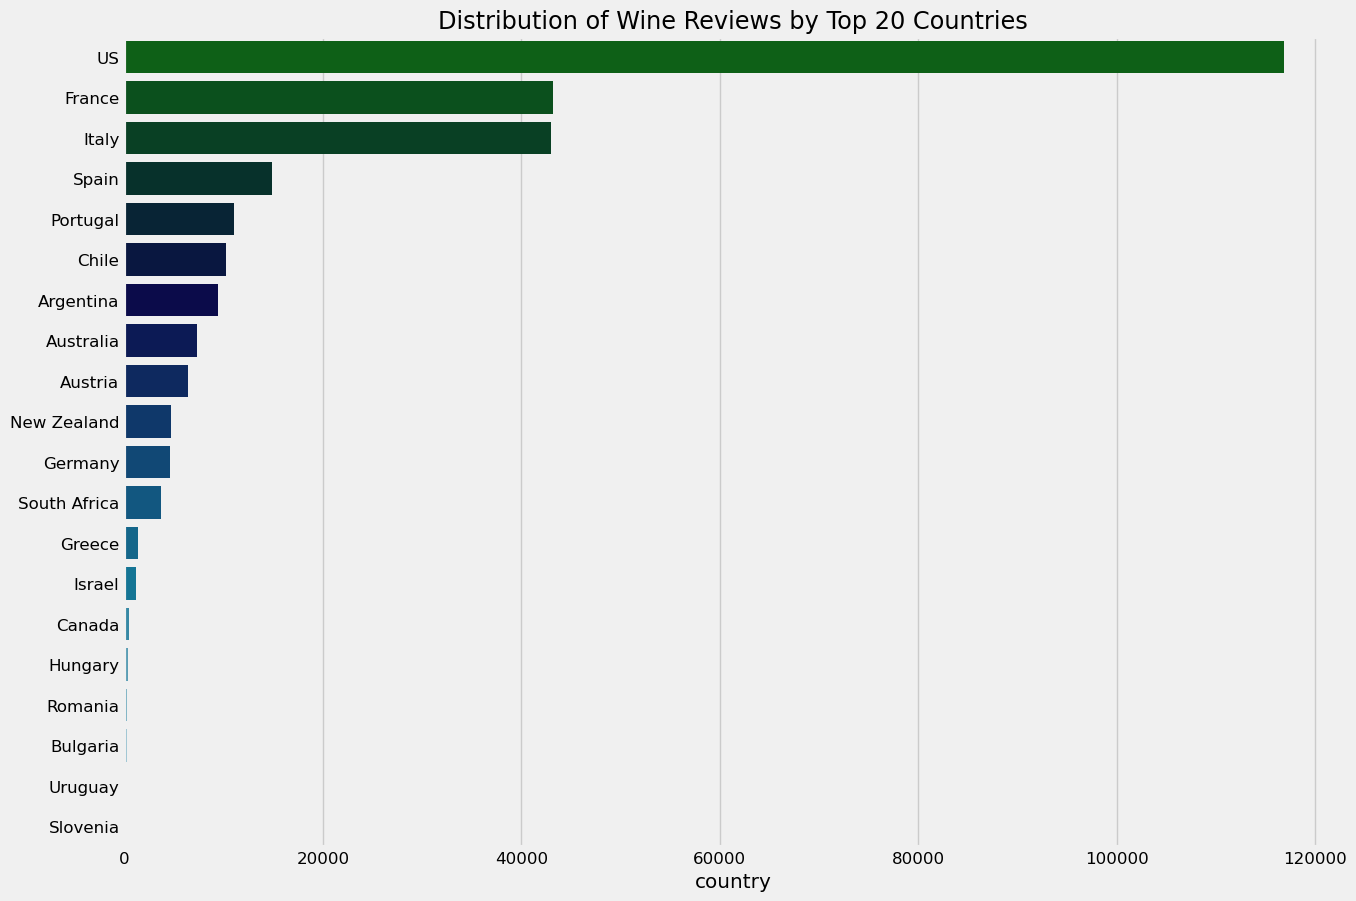

In [42]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries');

/var/folders/8v/s97w1sj53zvbn_x15rw782mm0000gp/T/ipykernel_14159/1915538157.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['price'].fillna(wine['price'].mean()),color='r',ax=ax1)


Text(0.5, 1.0, 'Boxplot of price')

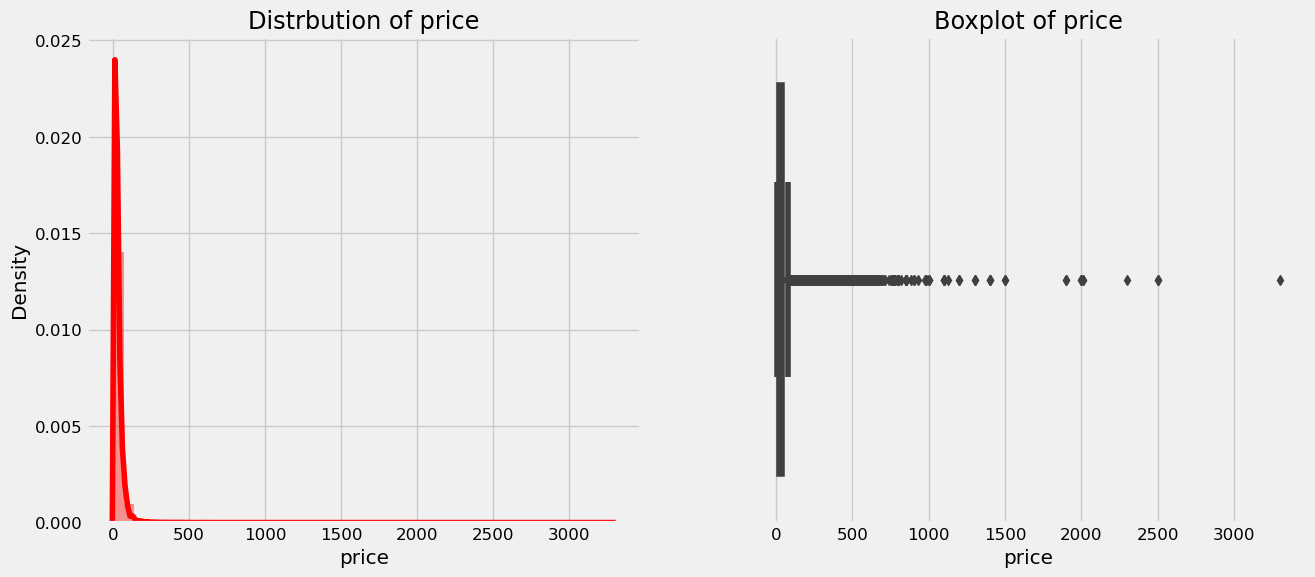

In [11]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distribution of price')
sns.boxplot(x = wine['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

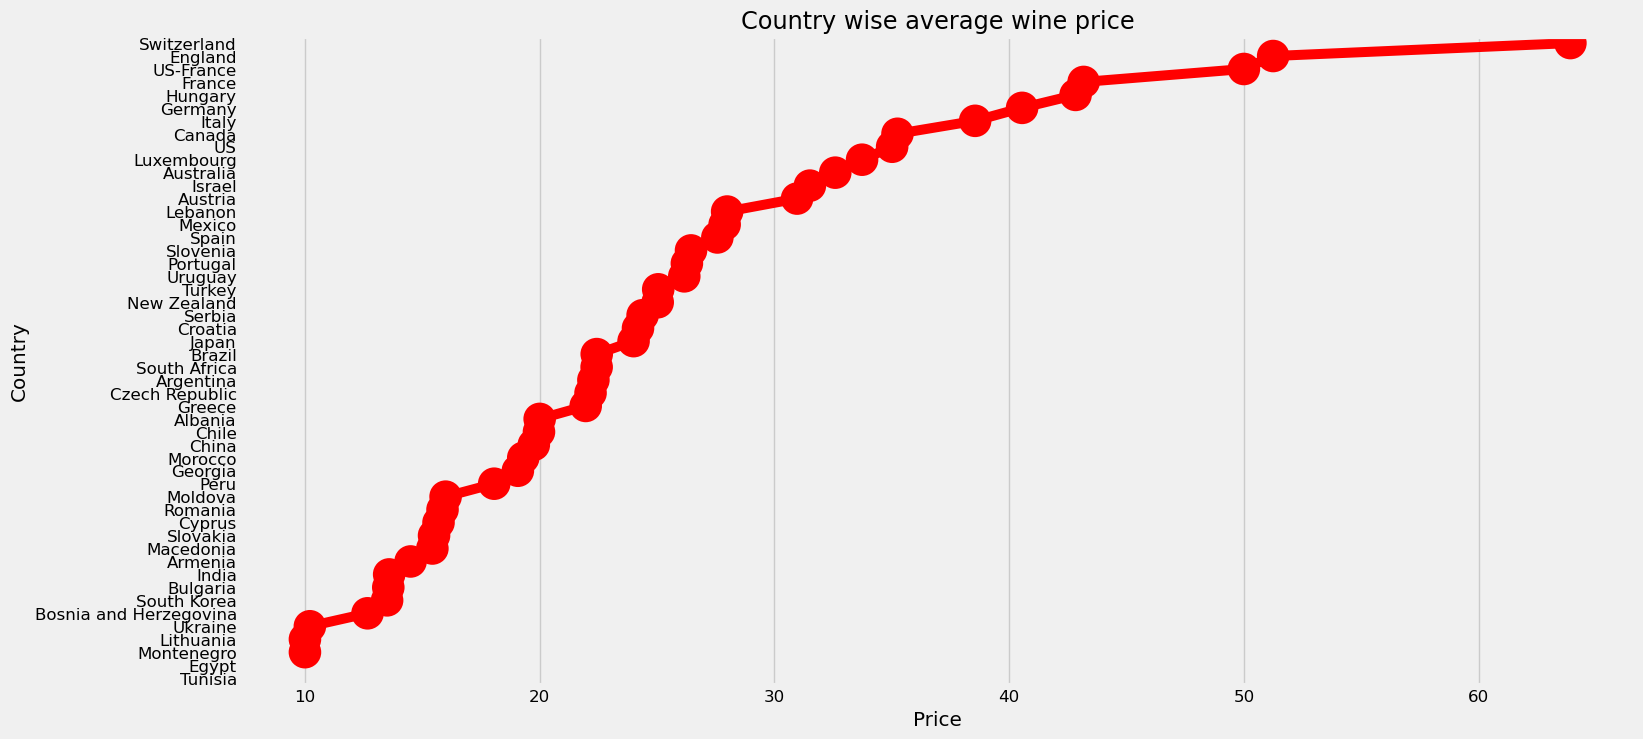

In [12]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

<AxesSubplot:>

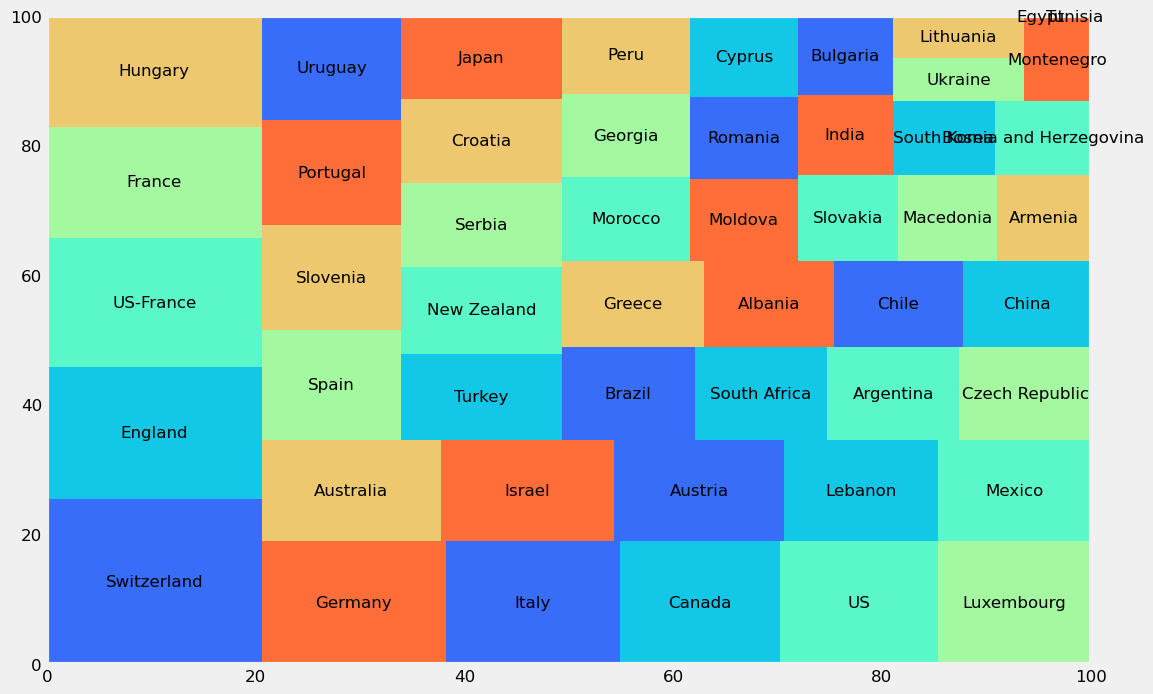

In [13]:
cnt = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)

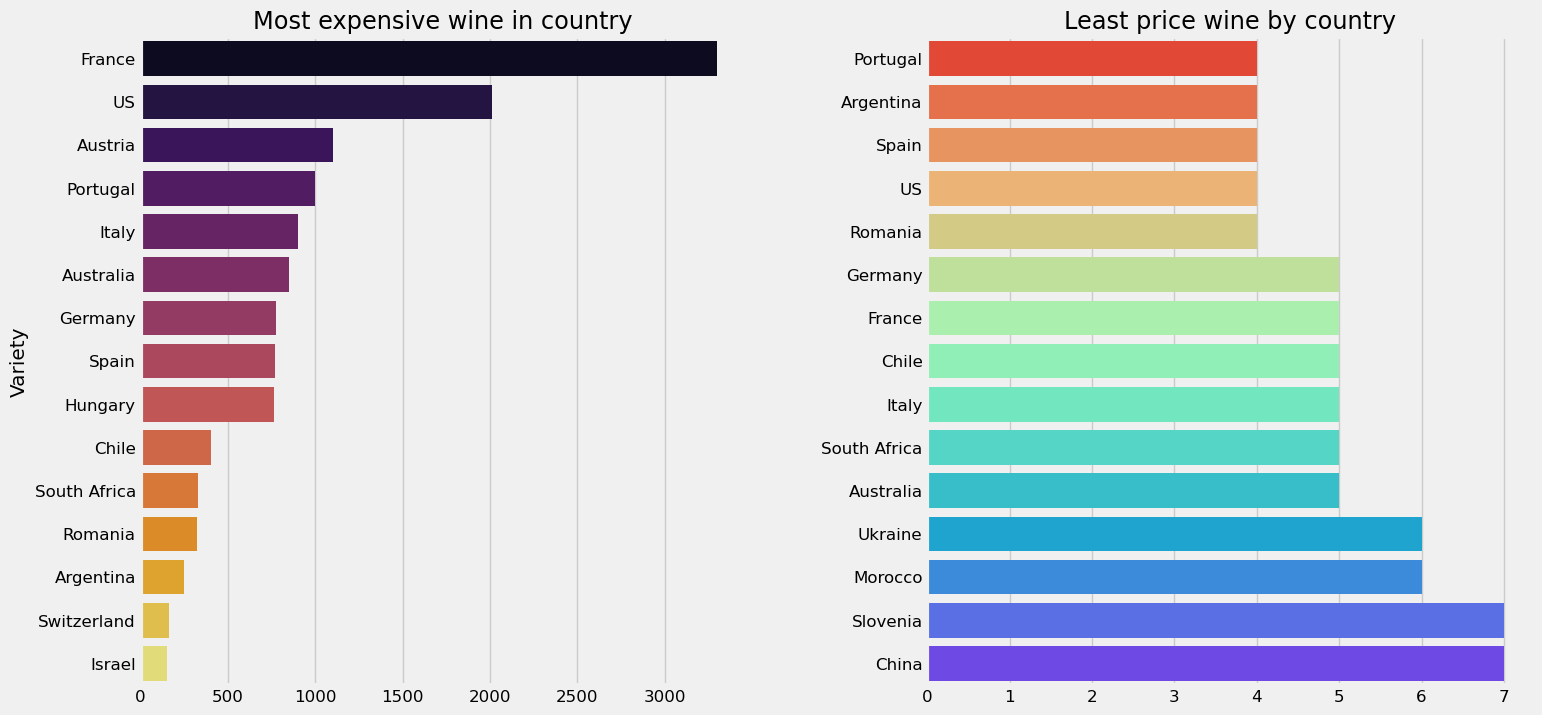

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

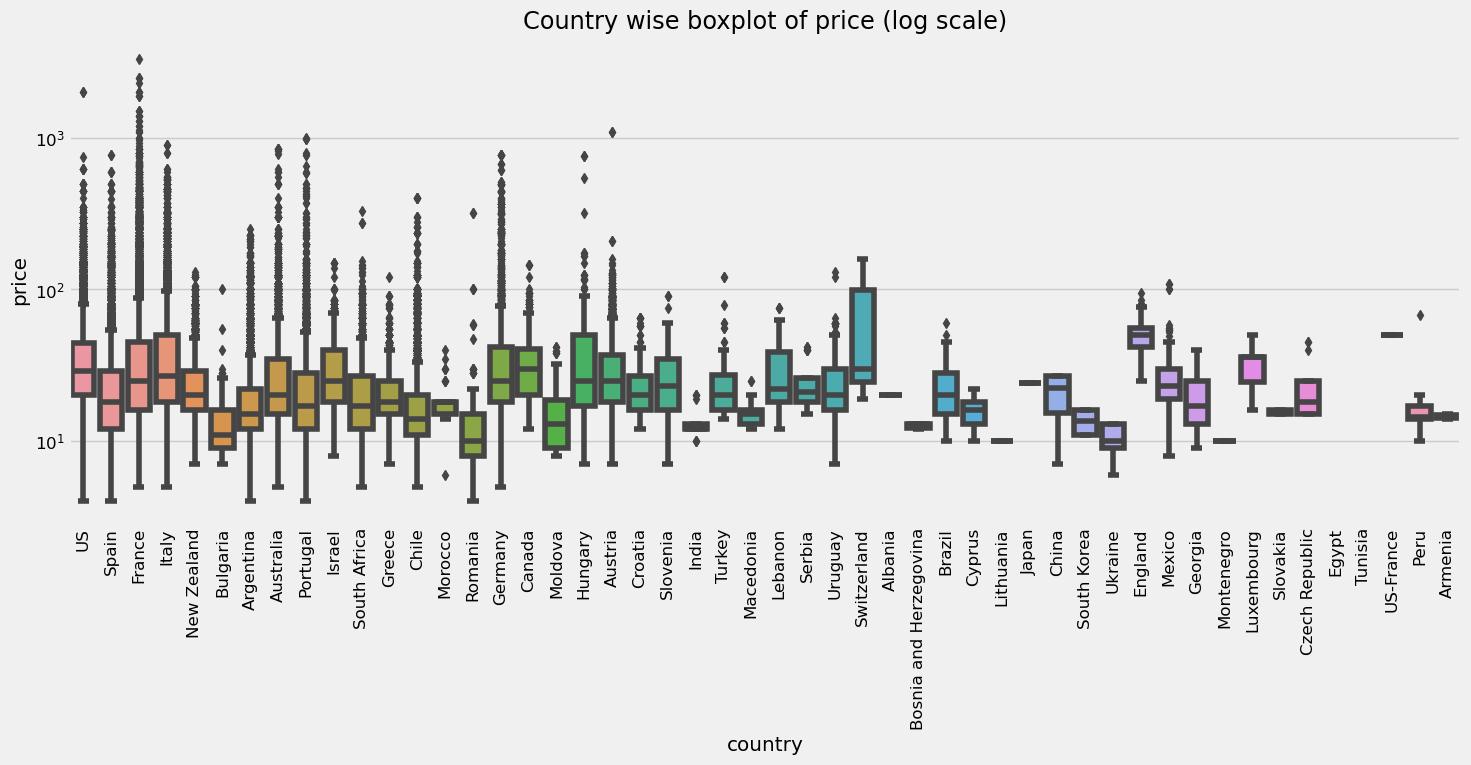

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log")
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

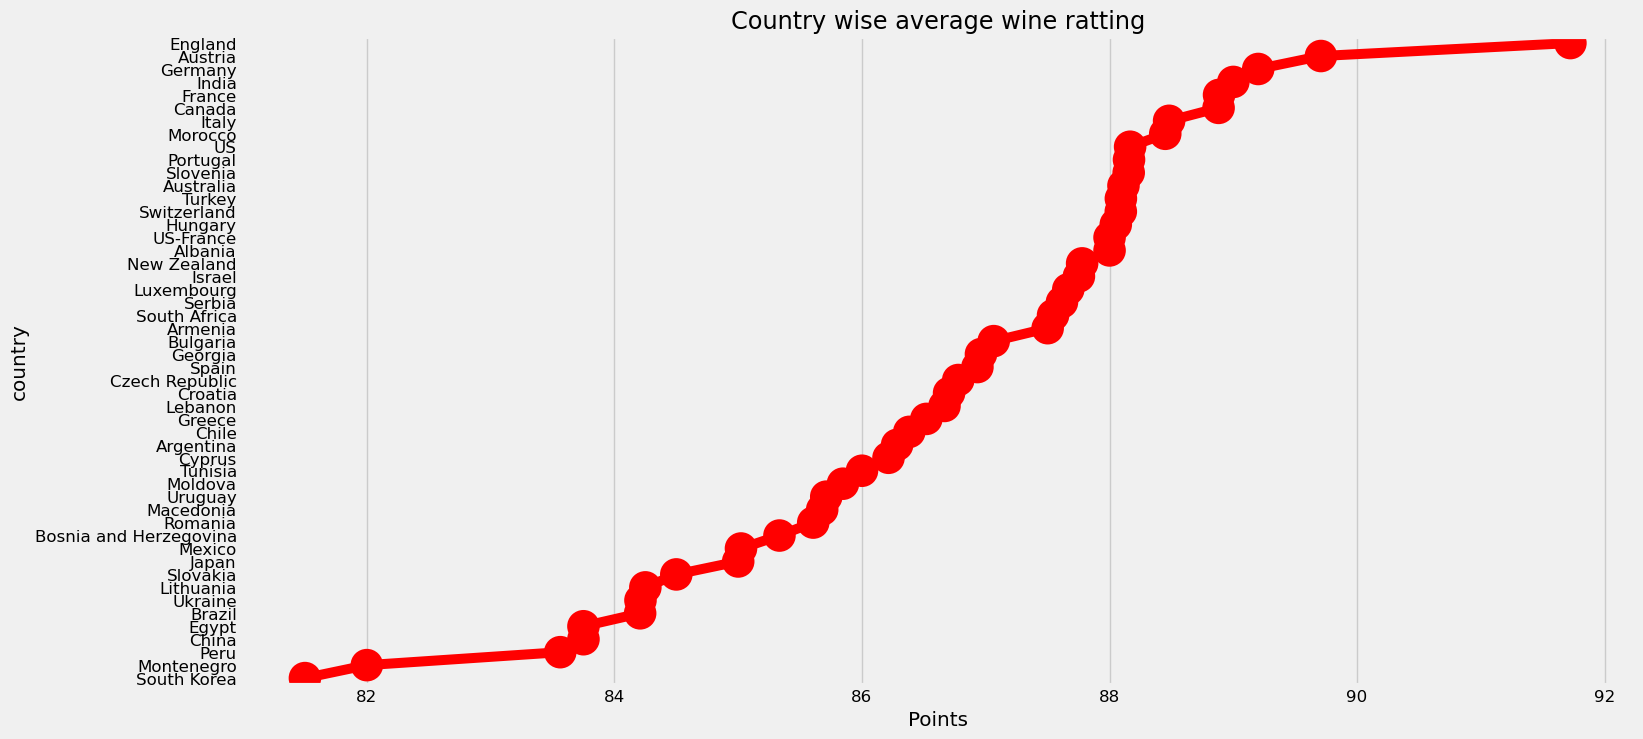

In [16]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

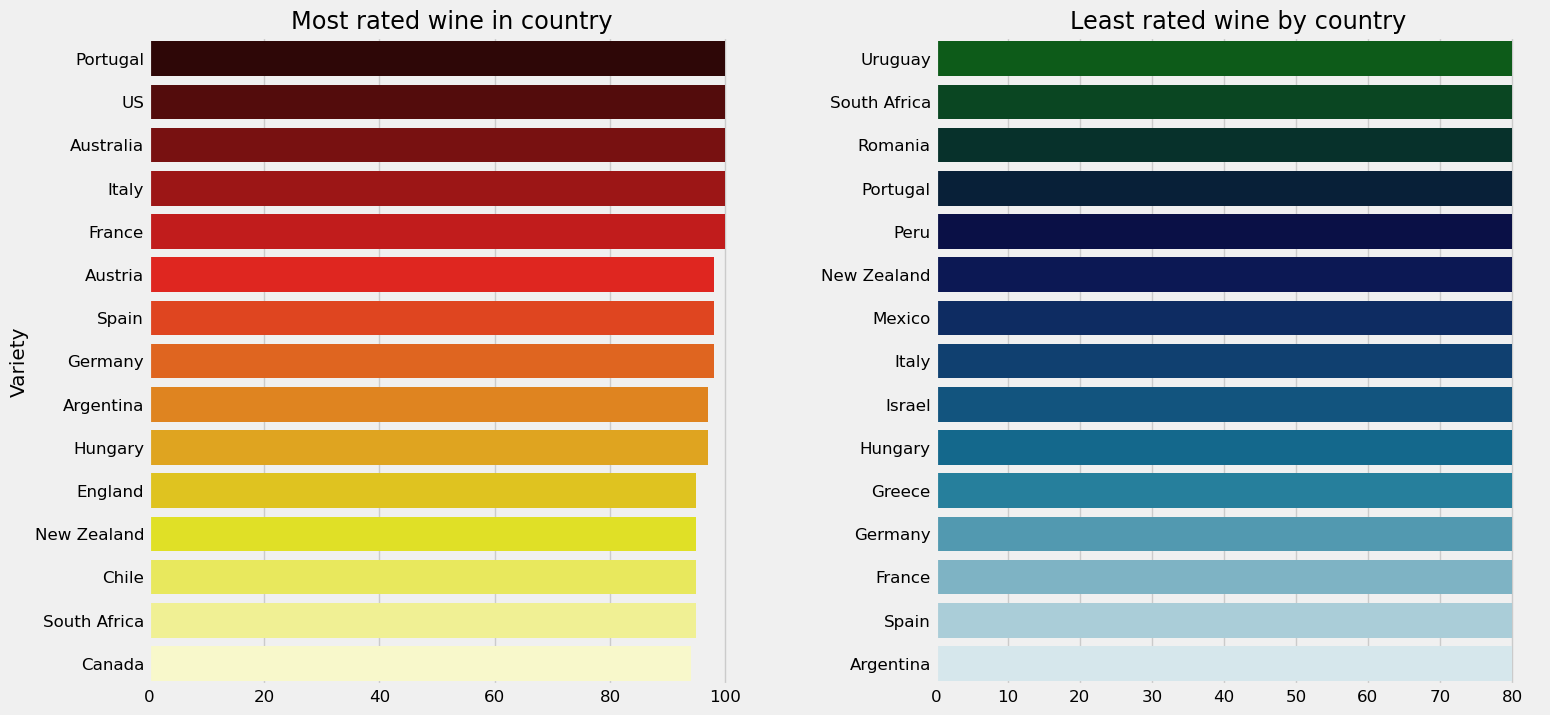

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

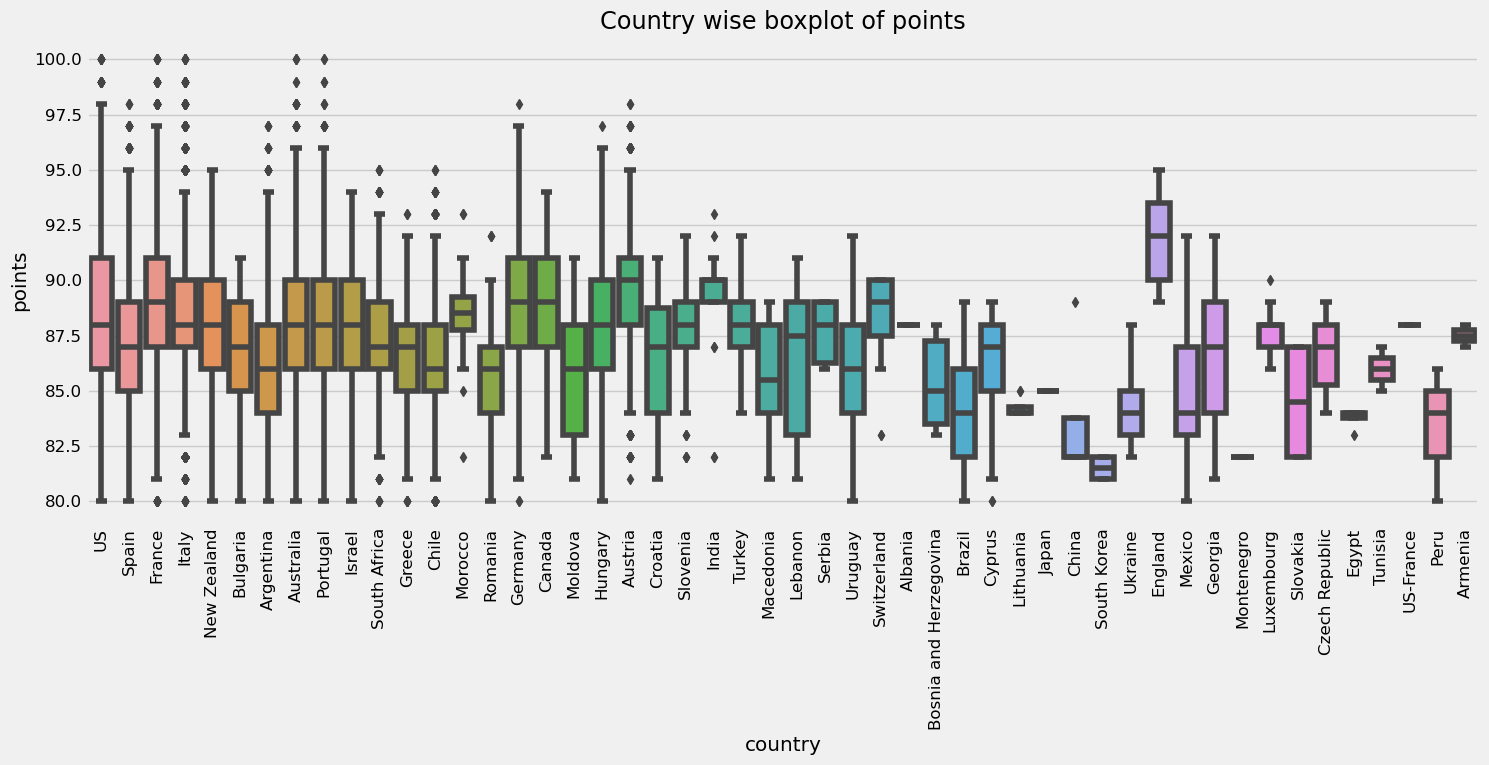

In [18]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['points'])
#sns.pointplot(x = wine['country'], y = wine['points'])
plt.title('Country wise boxplot of points')
plt.xticks(rotation=90);

/Users/CLB/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

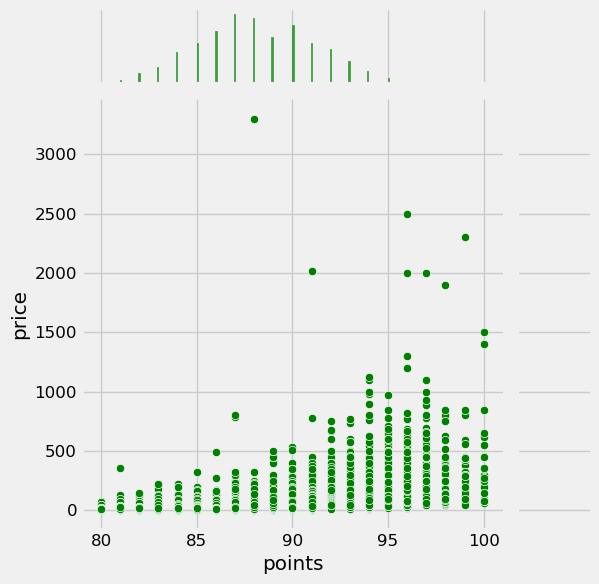

In [19]:
sns.jointplot( x = wine['points'],y = wine['price'],color='g');

Number of varity of wines 756


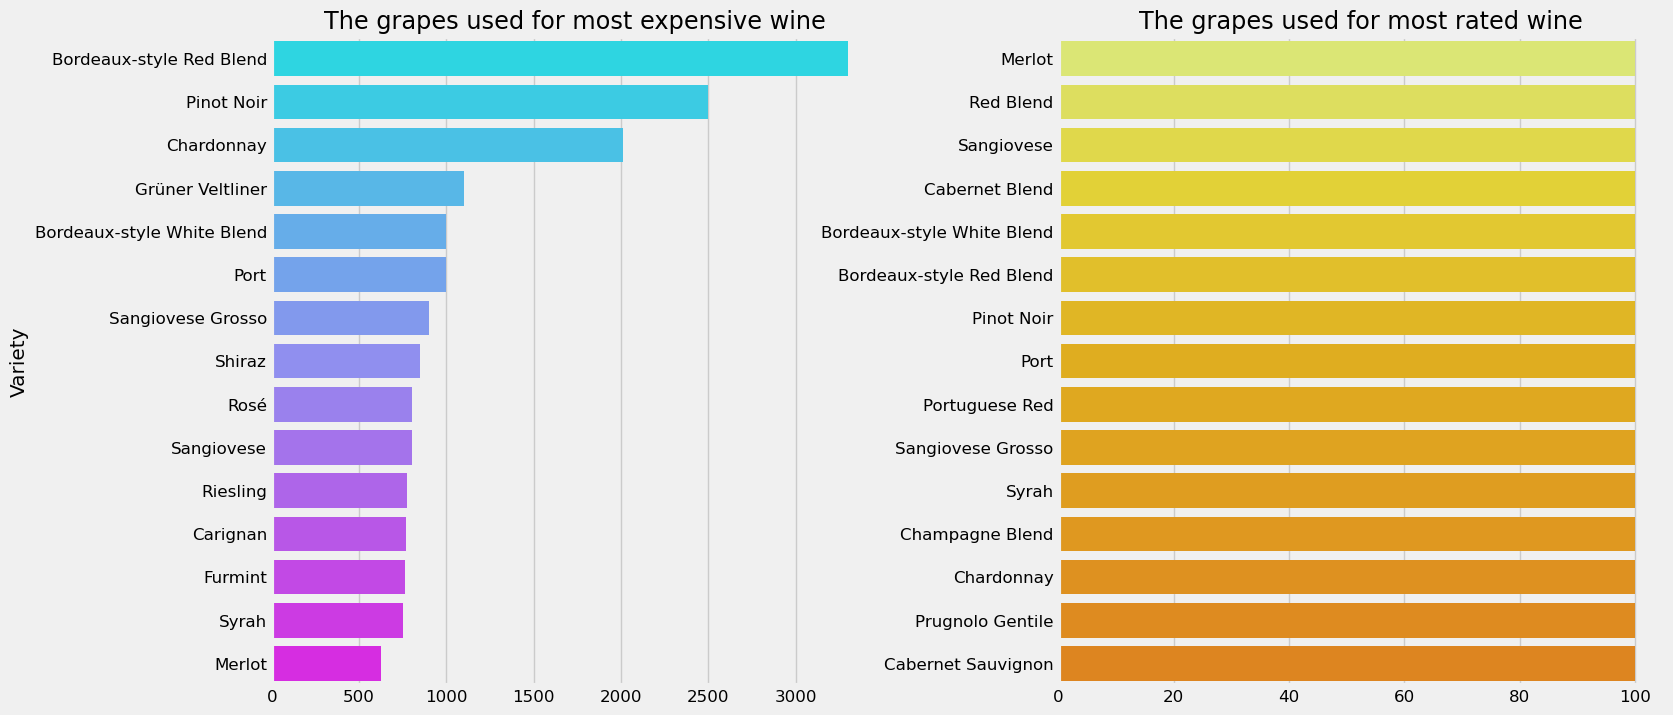

In [20]:
print('Number of variety of wines',wine['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

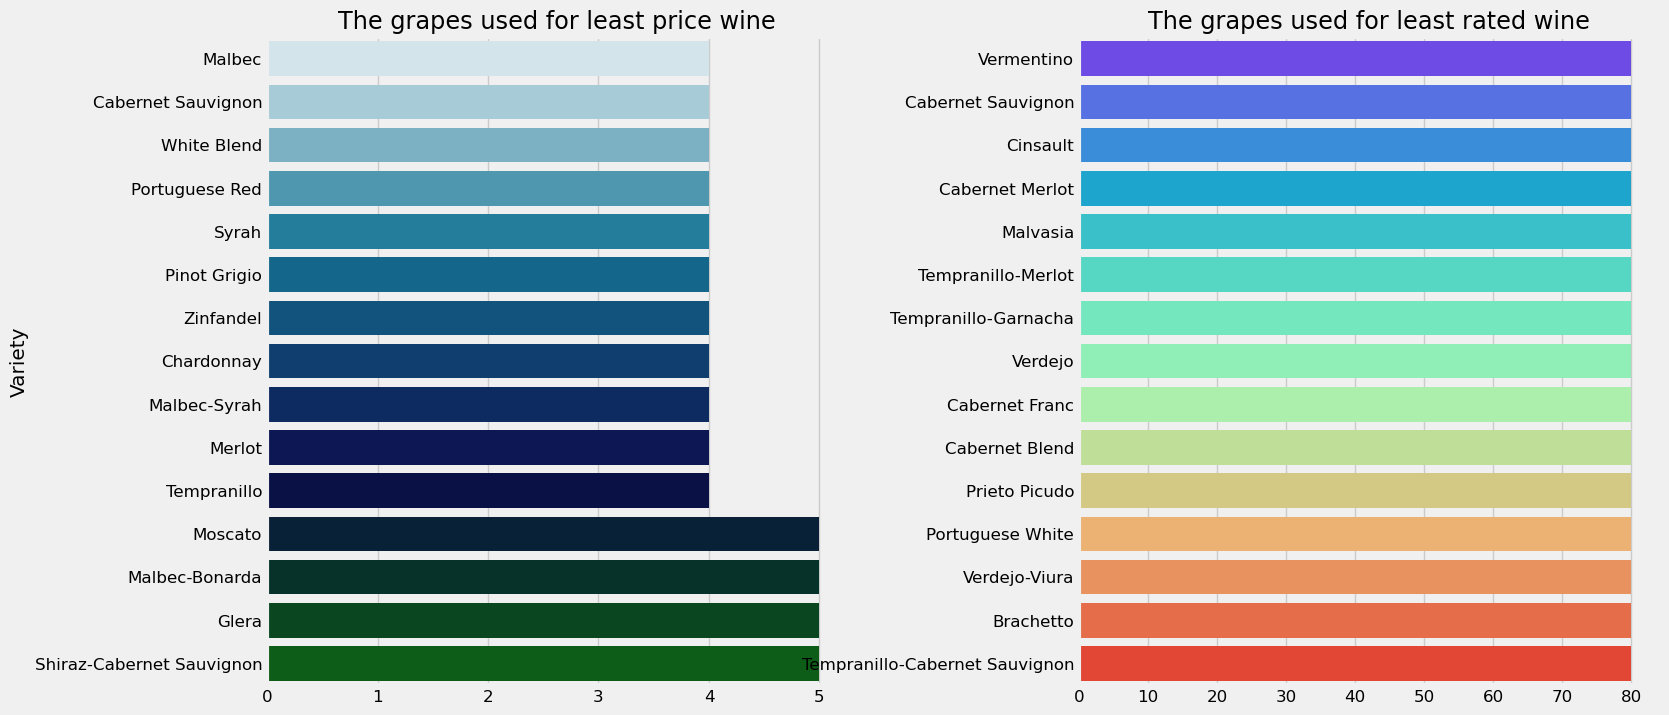

In [21]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index,palette = 'ocean_r',ax=ax1)
ax1.set_title('The grapes used for least price wine')
ax1.set_xlabel('')
ax1.set_ylabel('Variety')

cnt = wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index,palette= 'rainbow', ax=ax2)
ax2.set_title('The grapes used for least rated wine')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.subplots_adjust(wspace=0.4);

In [22]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,France,100,12,150.000000,1500.000000,877.583333
1,Germany,98,1,775.000000,775.000000,775.000000
2,France,99,10,159.000000,2300.000000,632.400000
3,Australia,99,2,300.000000,850.000000,575.000000
4,Portugal,100,2,450.000000,650.000000,550.000000
5,France,98,43,70.000000,1900.000000,448.813953
6,Spain,98,3,440.000000,450.000000,446.666667
7,Germany,97,16,245.000000,775.000000,392.562500
8,Portugal,99,3,268.000000,426.000000,373.333333
9,Italy,100,11,195.000000,550.000000,334.545455


Number of vineyard designation 47239


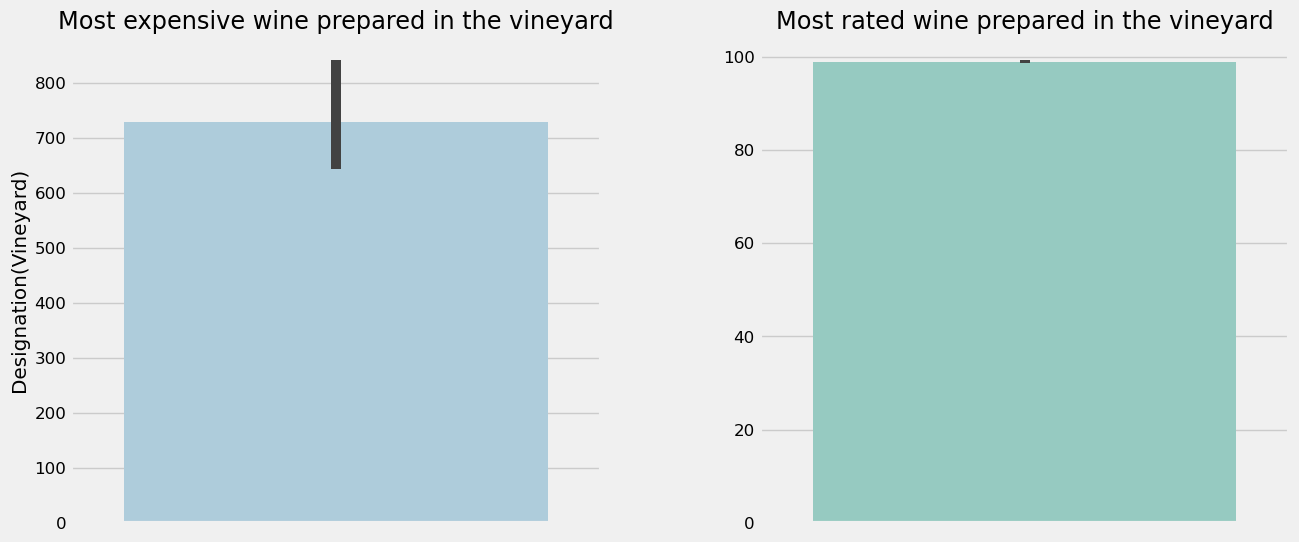

In [23]:
print('Number of vineyard designation',wine['designation'].nunique())
cnt = wine.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation(Vineyard)')
ax1.set_title('Most expensive wine prepared in the vineyard')

cnt = wine.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine prepared in the vineyard')
plt.subplots_adjust(wspace=0.3)

Number of winerys: 19186


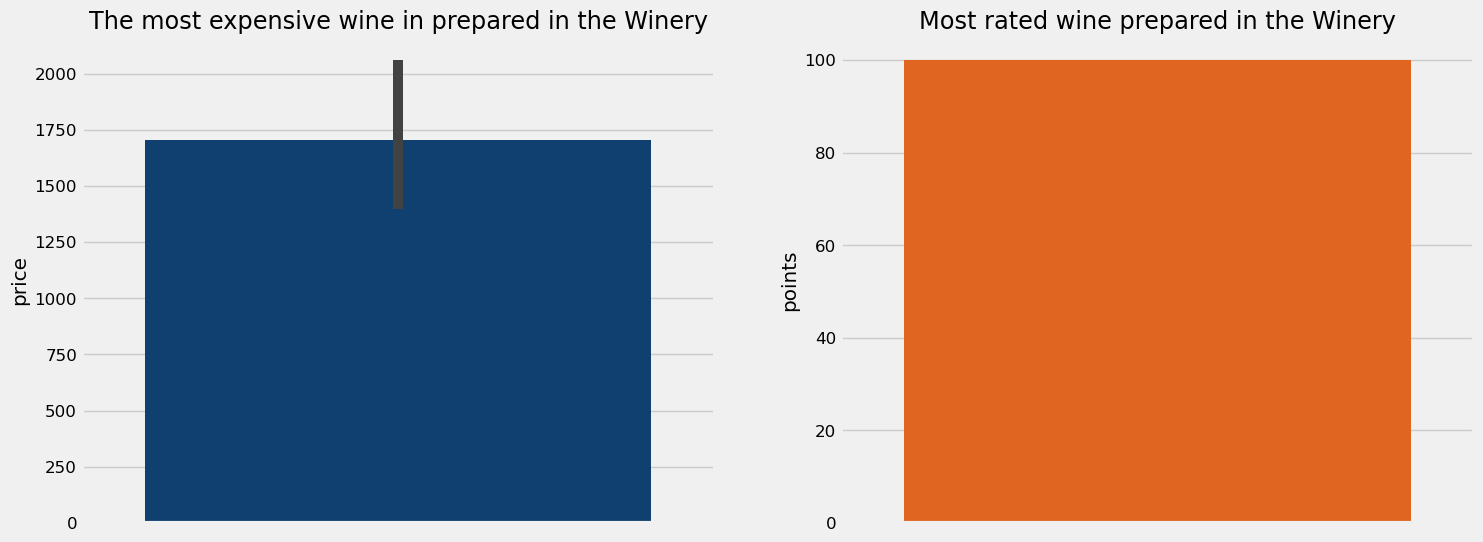

In [24]:
print('Number of winerys:',wine['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in prepared in the Winery')
cnt = wine.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine prepared in the Winery');

Number of province: 490


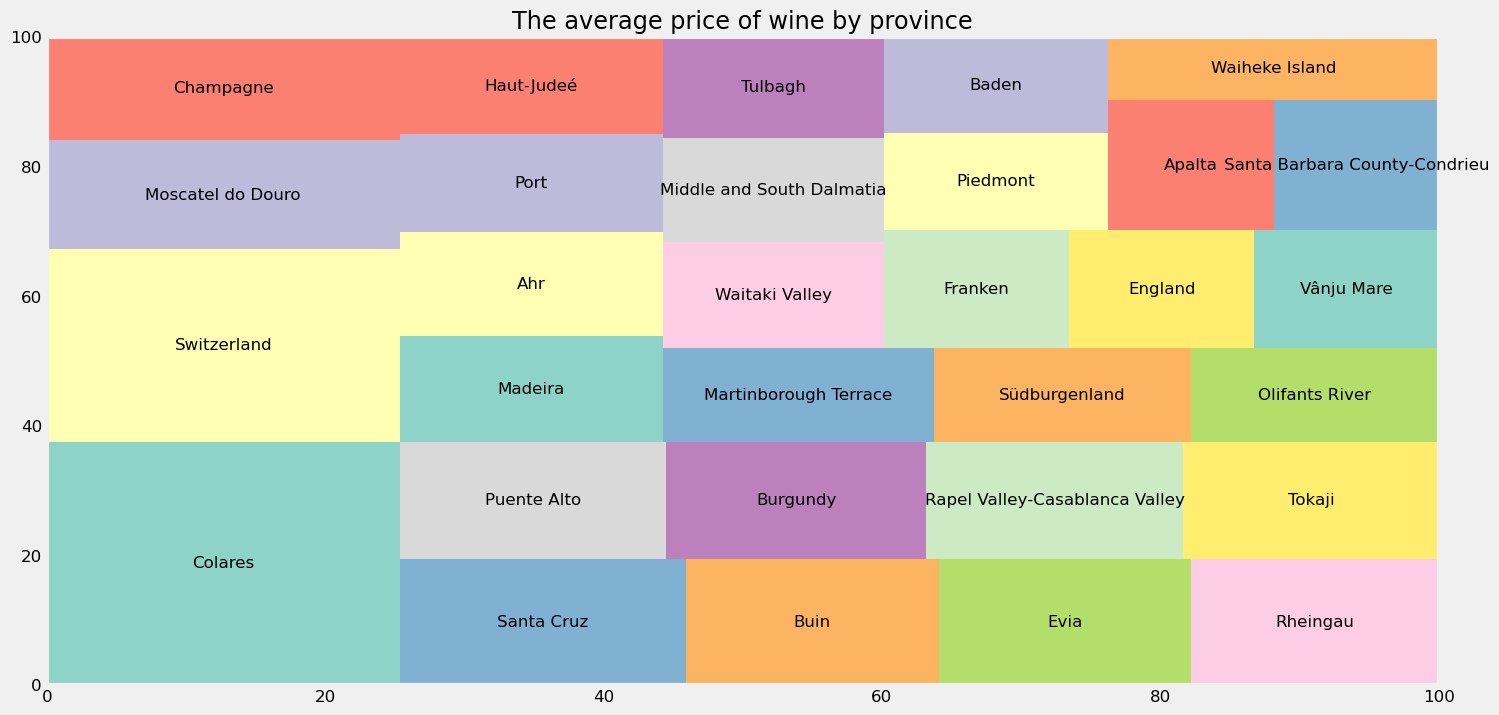

In [25]:
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');

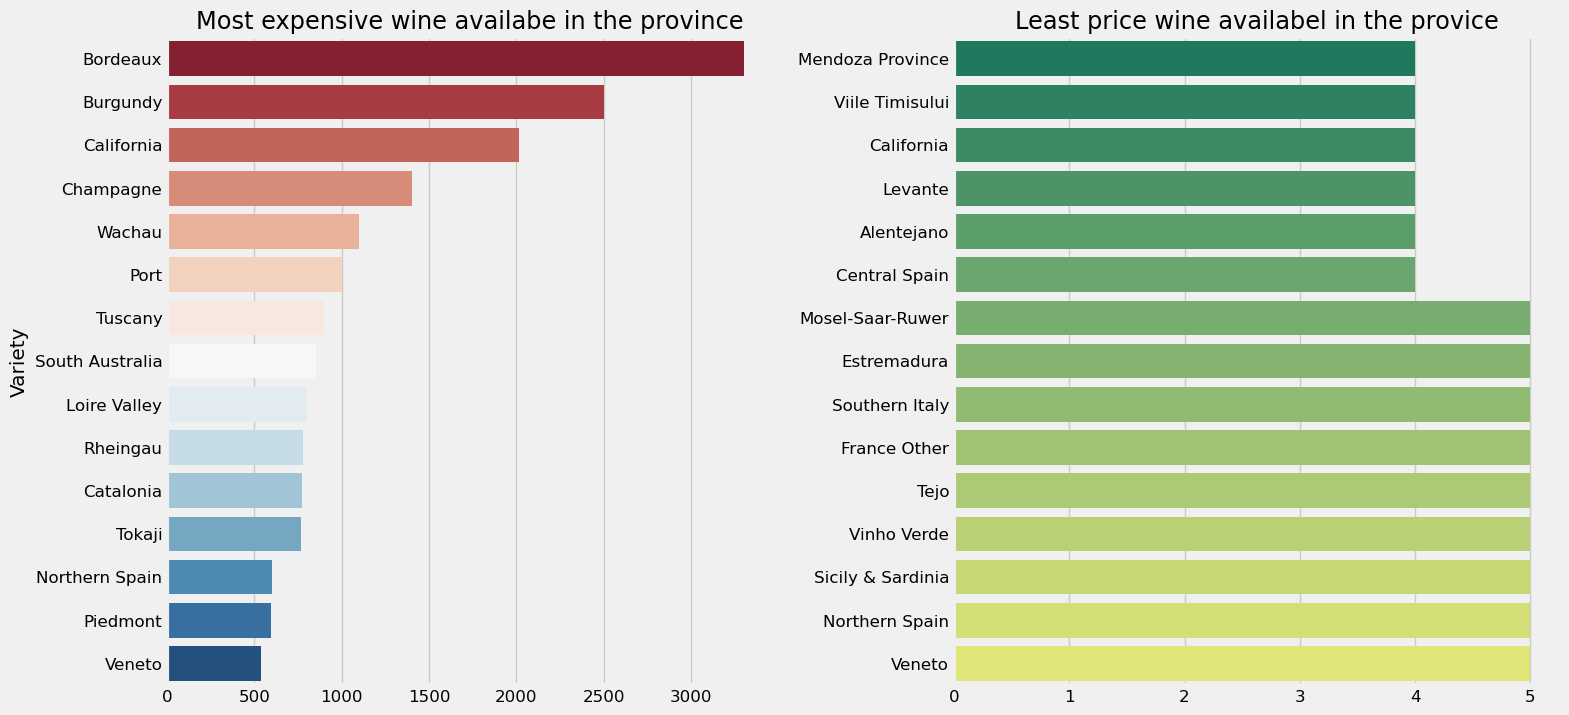

In [26]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine available in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine available in the province')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [27]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Bordeaux,France,99,1,2300.000000,2300.000000,2300.000000
1,Champagne,France,100,6,250.000000,1400.000000,887.666667
2,Bordeaux,France,100,6,150.000000,1500.000000,867.500000
3,South Australia,Australia,99,1,850.000000,850.000000,850.000000
4,Rheingau,Germany,98,1,775.000000,775.000000,775.000000
5,Port,Portugal,100,1,650.000000,650.000000,650.000000
6,Bordeaux,France,98,16,70.000000,1900.000000,586.062500
7,Burgundy,France,99,1,560.000000,560.000000,560.000000
8,Rheingau,Germany,97,7,445.000000,775.000000,551.571429
9,Colares,Portugal,93,1,495.000000,495.000000,495.000000


Number of province: 1332


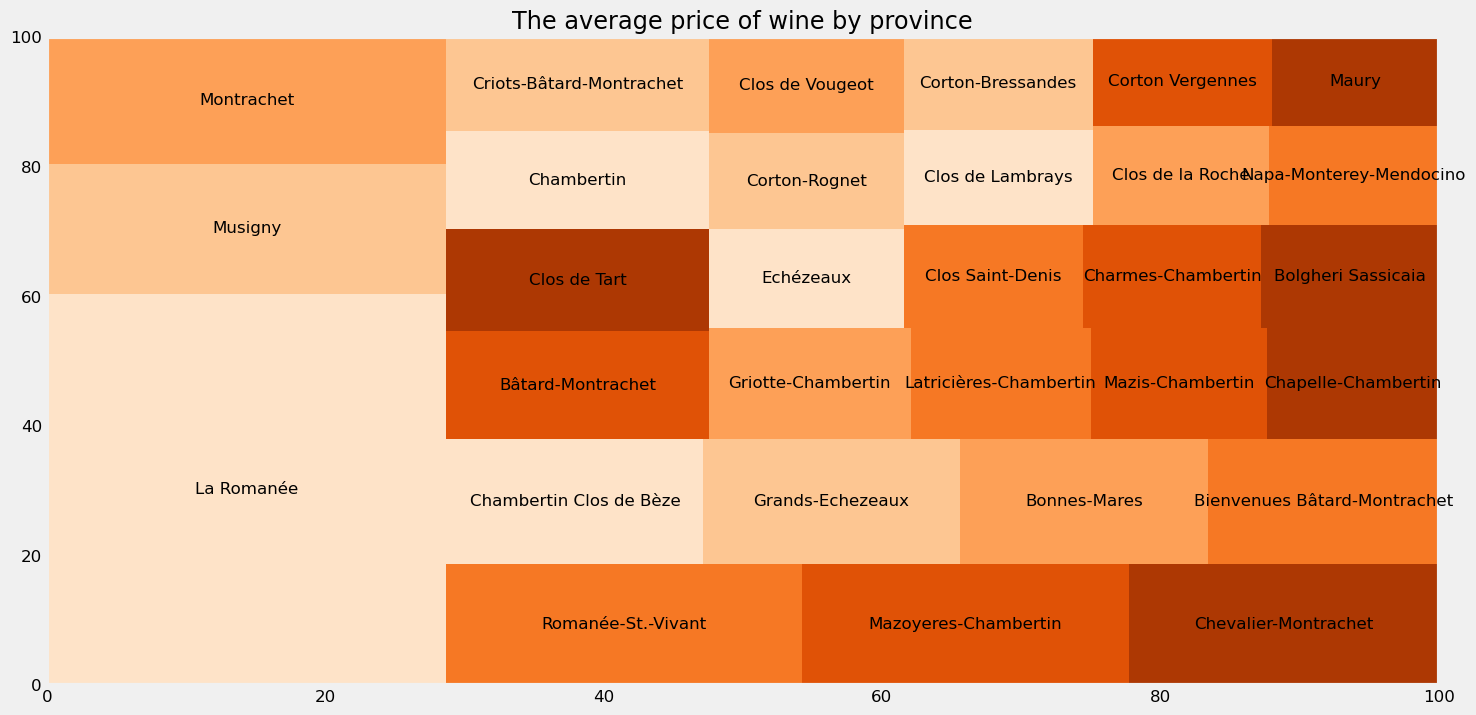

In [28]:
print('Number of province:',wine['region_1'].nunique())
cnt = wine.groupby(['region_1'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Oranges'))
plt.title('The average price of wine by province');

In [29]:
cnt = wine.groupby(['country','province','points','region_1',])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace = True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Bordeaux,99,Pauillac,1,2300.000000,2300.000000,2300.000000
1,France,Burgundy,96,La Romanée,2,2000.000000,2500.000000,2250.000000
2,France,Bordeaux,100,Saint-Émilion,1,1500.000000,1500.000000,1500.000000
3,France,Bordeaux,100,Pauillac,1,1500.000000,1500.000000,1500.000000
4,France,Bordeaux,98,Margaux,4,380.000000,1900.000000,1140.000000
5,France,Burgundy,94,La Romanée,1,1125.000000,1125.000000,1125.000000
6,France,Champagne,100,Champagne,6,250.000000,1400.000000,887.666667
7,Australia,South Australia,99,South Australia,1,850.000000,850.000000,850.000000
8,Australia,South Australia,98,South Australia,3,850.000000,850.000000,850.000000
9,France,Bordeaux,100,Pessac-Léognan,2,848.000000,848.000000,848.000000


                        count unique         top   freq
taster_name            103727     19  Roger Voss  25514
taster_twitter_handle   98758     15  @vossroger  25514


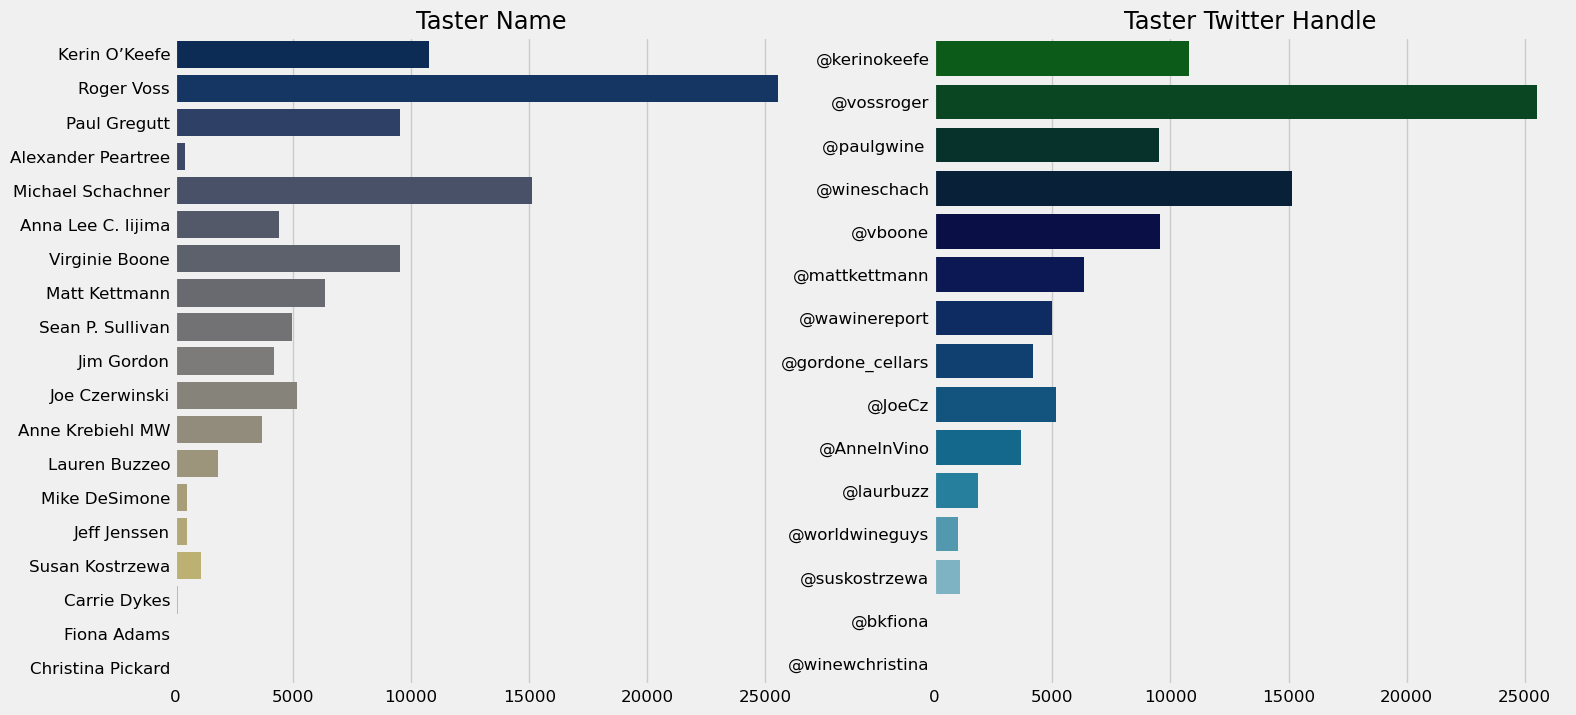

In [31]:
print(wine[['taster_name','taster_twitter_handle']].describe().T)
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sns.countplot(y = wine['taster_name'], palette = 'cividis', ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(y = wine['taster_twitter_handle'], palette = 'ocean', ax =ax2)
ax2.set_title('Taster Twitter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

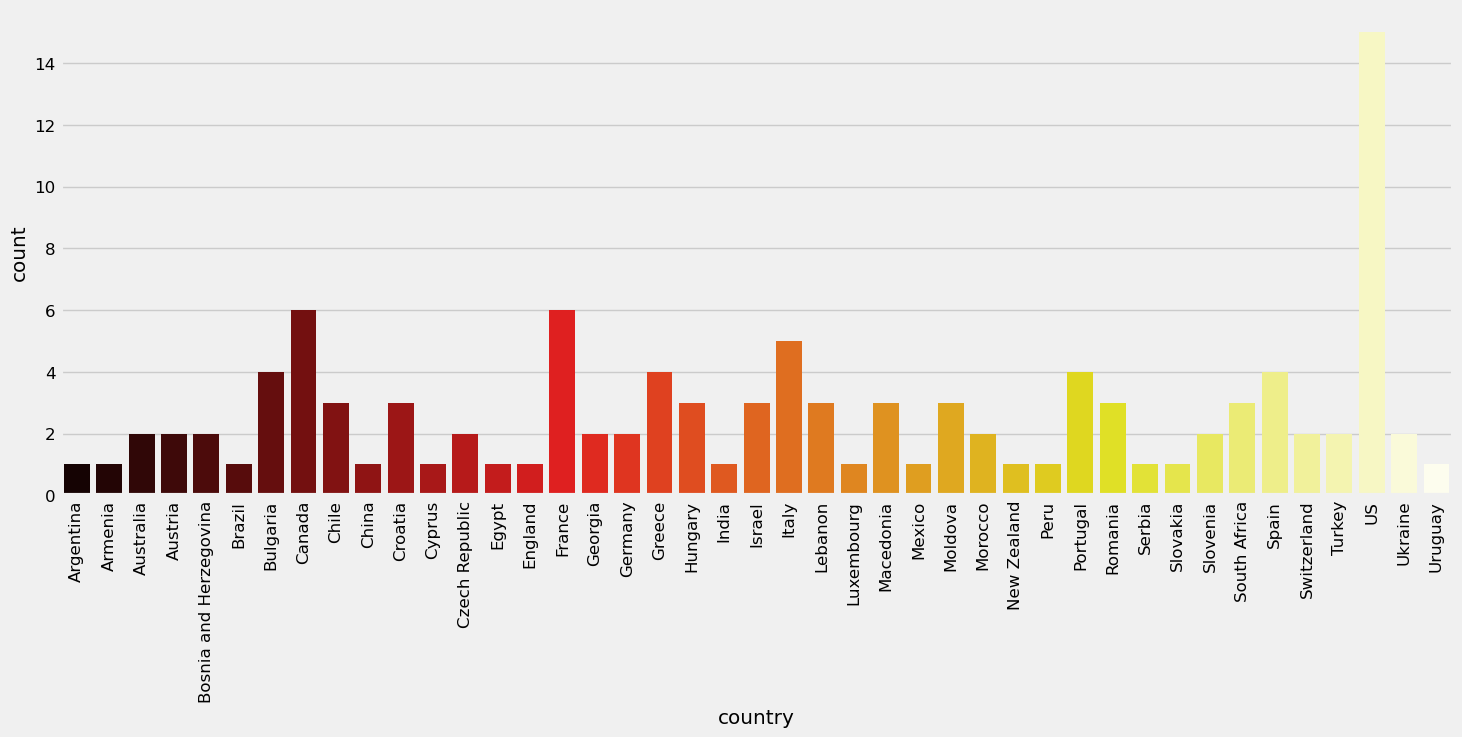

In [32]:
plt.figure(figsize = (16,6))
cnt = wine.groupby(['country','taster_name',]).count().reset_index()
sns.countplot(x = cnt['country'], palette='hot')
plt.xticks(rotation = 90);

(-0.5, 399.5, 199.5, -0.5)

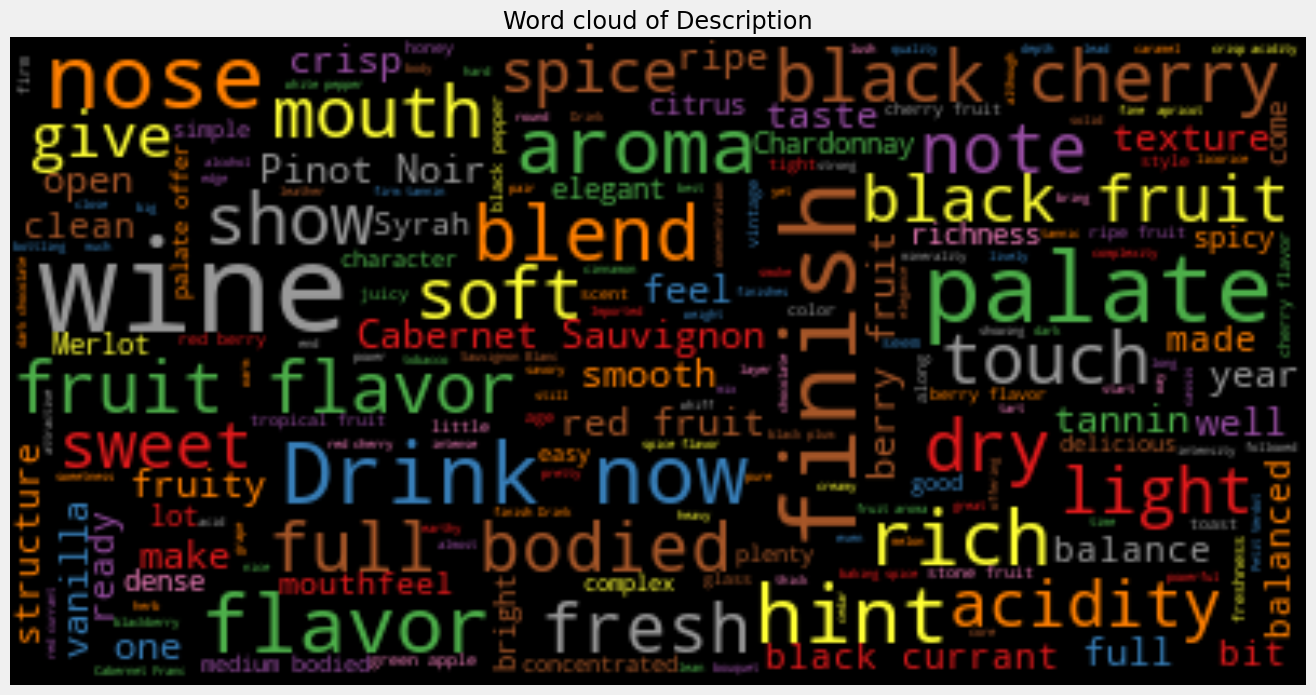

In [34]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

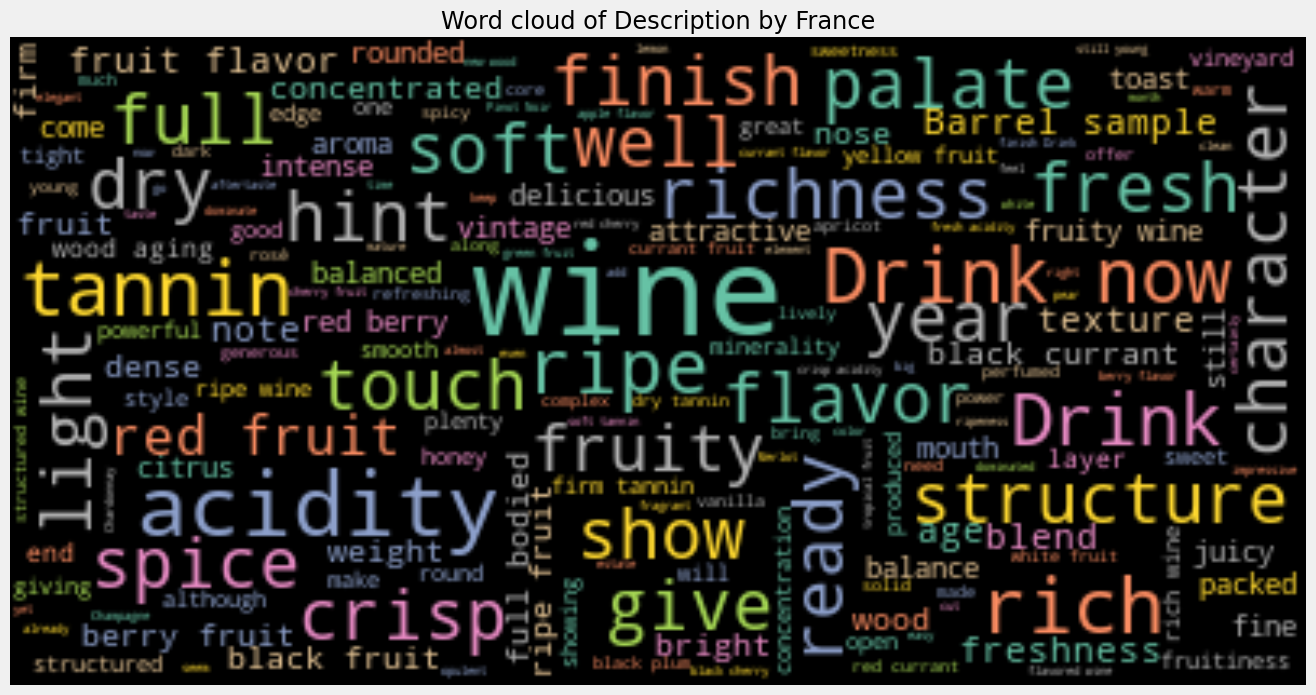

In [35]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by France')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS)
wc.generate(' '.join(wine[wine['country'] =='France']['description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

In [36]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [37]:
wine1 = wine.copy()

In [38]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [39]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [41]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recmmendation for Gouveio:

1: Tinta Francisca with distance: 0.0
2: Códega do Larinho with distance: 0.0
3: Rabigato with distance: 0.0
4: Portuguese Rosé with distance: 0.0
5: Gouveio with distance: 0.0
